In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
university = pd.read_csv('Admission.csv')

In [17]:
university.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
university=university.drop('Serial No.',axis=1)

In [33]:
university.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [25]:
column_headers = university.columns.values
column_headers

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ',
       'CGPA', 'Research', 'Admission Chance'], dtype=object)

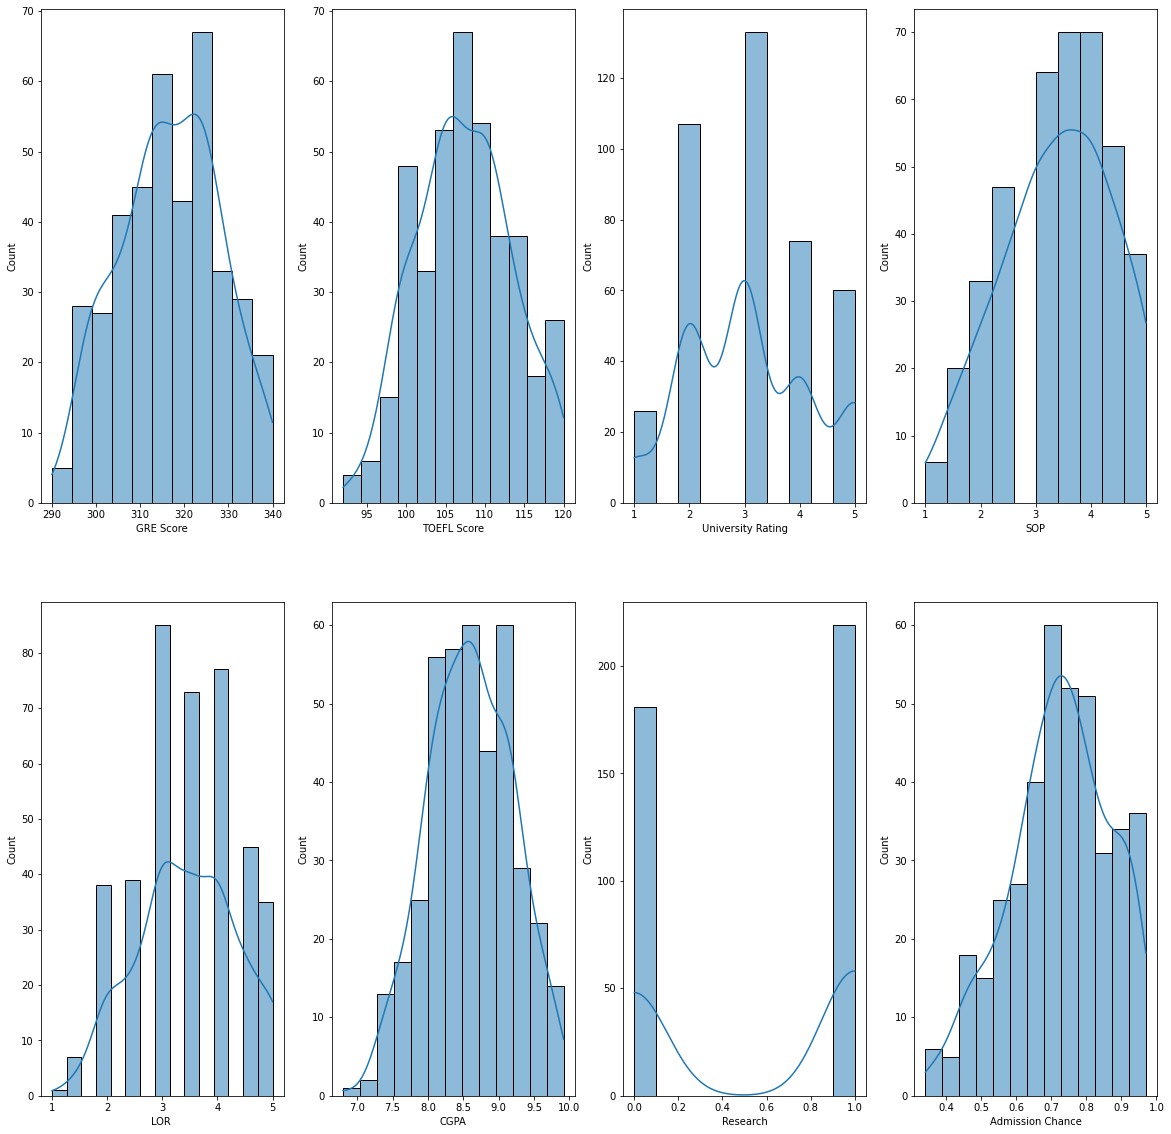

In [32]:
fig,ax = plt.subplots(2,4,figsize=(20,20))
i=1
for column_header in column_headers:
    plt.subplot(2,4,i)
    sns.histplot(university[column_header],kde=True)
    i+=1

In [11]:
university.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Admission Chance   400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


<AxesSubplot:>

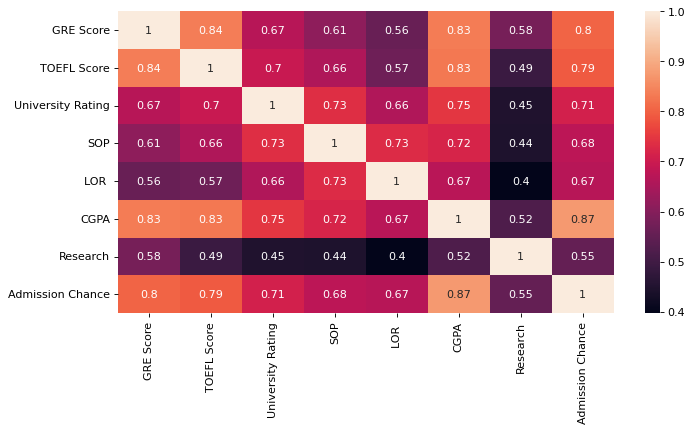

In [40]:
plt.figure(figsize=(10,5),dpi=80)
sns.heatmap(university.corr(),annot=True)

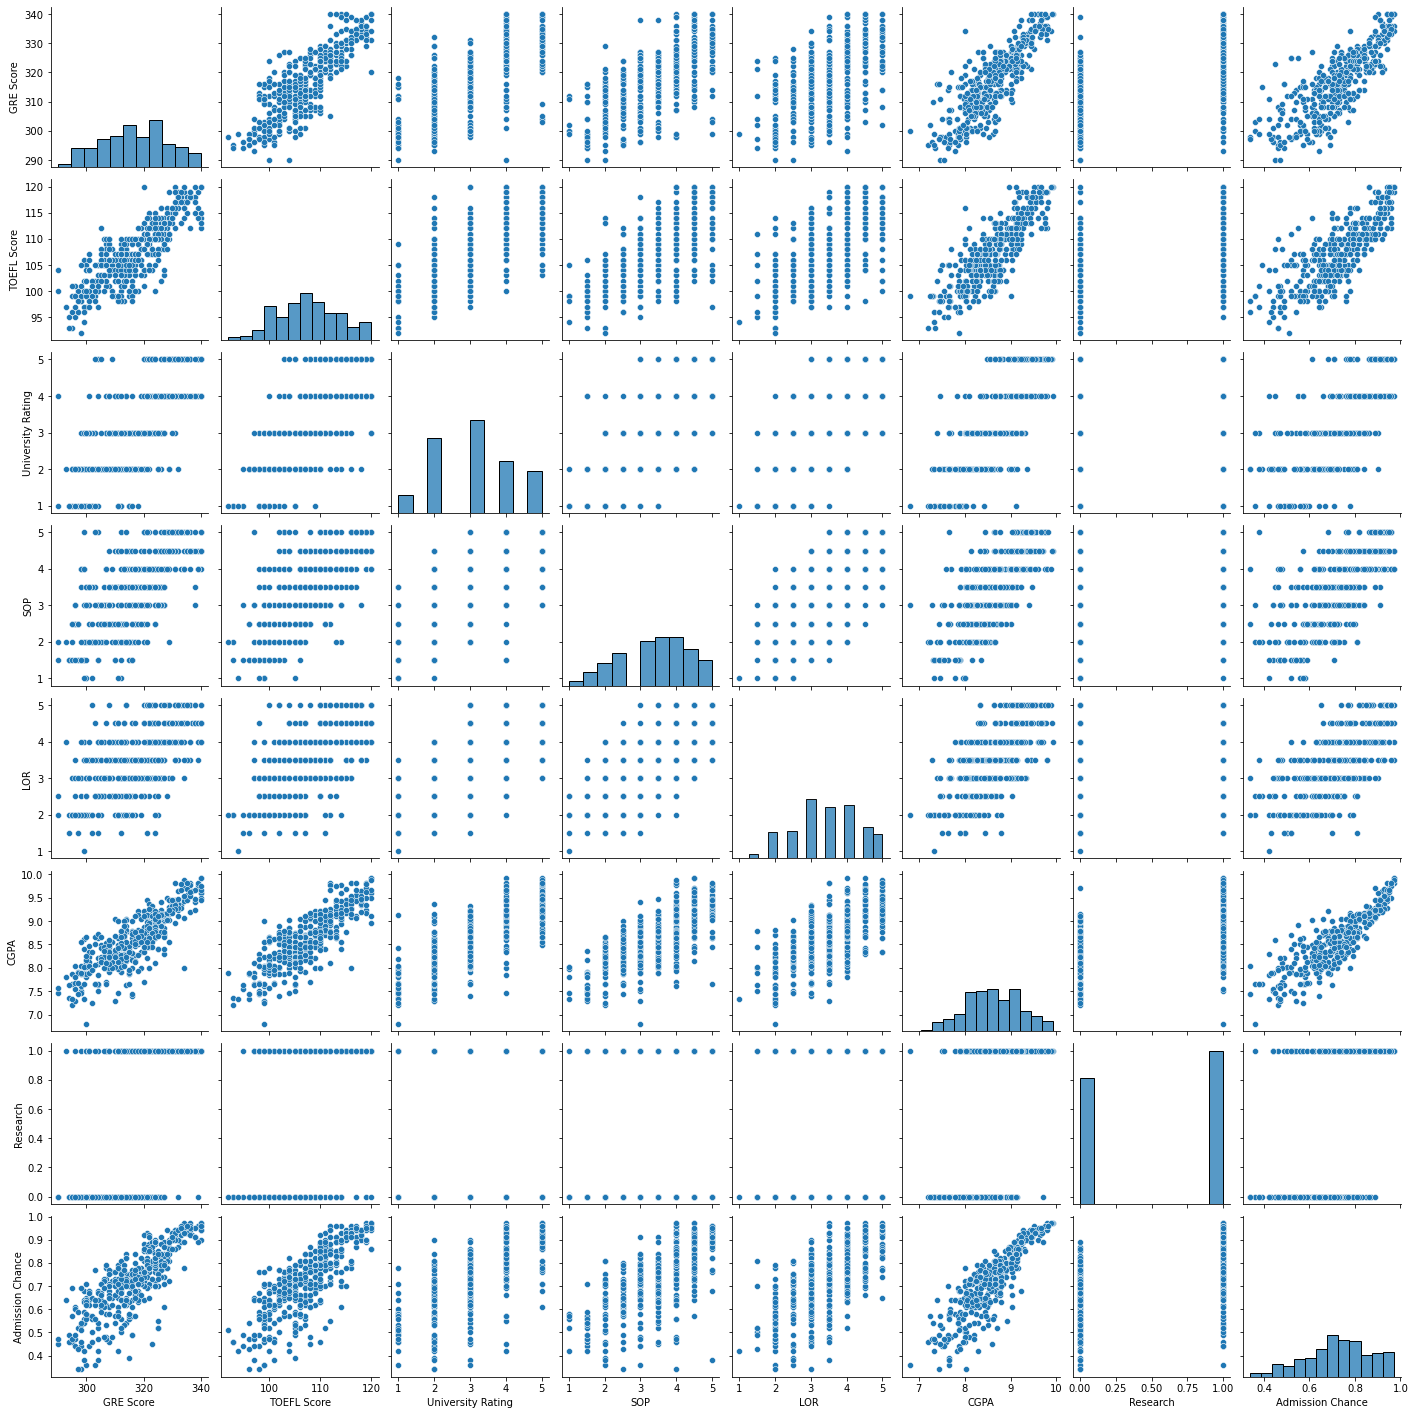

In [13]:
sns.pairplot(university)

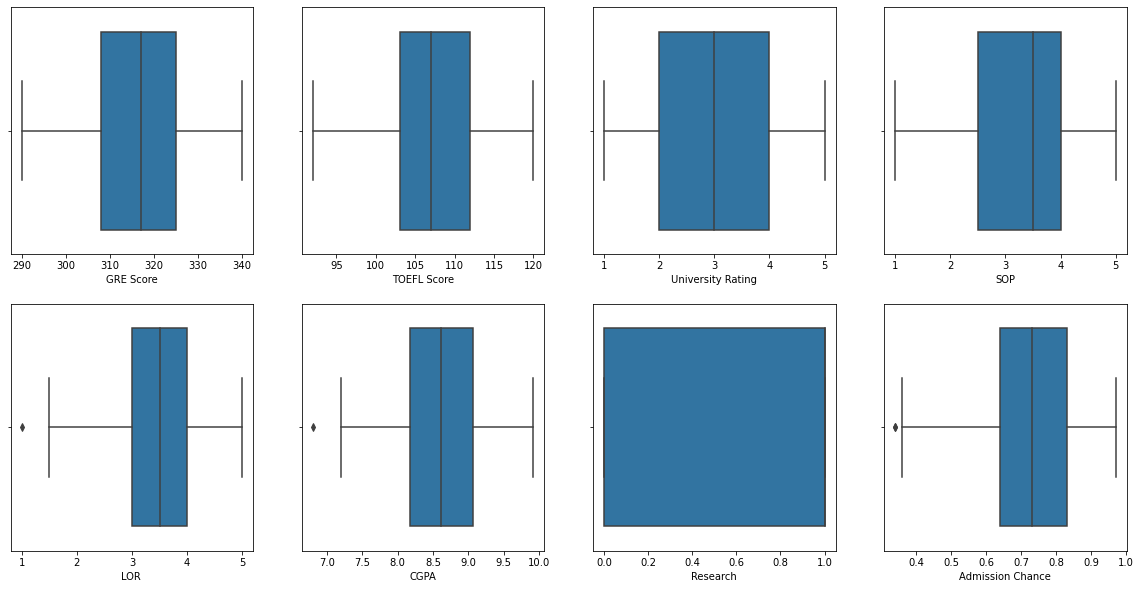

In [49]:
fig,ax = plt.subplots(2,4,figsize=(20,10))
i=1
for column_header in column_headers:
    plt.subplot(2,4,i)
    sns.boxplot(x=university[column_header],orient='h')
    i+=1

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = university.drop(['Admission Chance'],axis=1)

In [52]:
y = university['Admission Chance']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
regressor = LinearRegression(fit_intercept=True)

In [56]:
regressor.fit(X_train,y_train)

LinearRegression()

In [57]:
print(f'm is {regressor.coef_}')
print(f'b is {regressor.intercept_}')

m is [ 0.00186251  0.00272369  0.00737745 -0.00029274  0.01577024  0.11466916
  0.02222705]
b is -1.2302337510969923


In [58]:
y_predict = regressor.predict(X_test)

Text(0.5, 1.0, 'Predicted values vs True values')

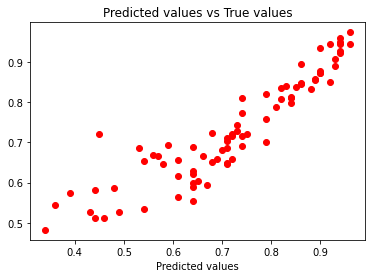

In [60]:
plt.scatter(y_test,y_predict,color='r')
plt.xlabel('True values')
plt.xlabel('Predicted values')
plt.title('Predicted values vs True values')

In [61]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

In [62]:
k=X_test.shape[1]
n=len(X_test)

In [63]:
MAE = mean_absolute_error(y_test,y_predict)
MAPE = mean_absolute_percentage_error(y_test,y_predict)
MSE = mean_squared_error(y_test,y_predict)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test,y_predict)
adj_r2 = 1 - ((n-1)*(1-r2)/(n-k-1))

In [64]:
print('MAE=',MAE,'\nMAPE=',MAPE,'\nMSE=',MSE,'\nRMSE=',RMSE,'\nr2=',r2,'\nadj_r2=',adj_r2)

MAE= 0.04795673362091199 
MAPE= 0.08511848732401697 
MSE= 0.0046170033772850085 
RMSE= 0.06794853476922816 
r2= 0.8212082591486992 
adj_r2= 0.8038257287881561


# Retraining the model

In [74]:
X = university[['GRE Score','TOEFL Score']] 

In [75]:
X

,GRE Score,TOEFL Score
0,337,118
1,324,107
2,316,104
3,322,110
4,314,103
...,...,...
395,324,110
396,325,107
397,330,116
398,312,103


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
X_test

,GRE Score,TOEFL Score
209,301,104
280,311,102
33,340,114
210,325,108
93,301,97
...,...,...
246,316,105
227,312,110
369,301,98
176,329,119


In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
regressor = LinearRegression(fit_intercept=True)

In [79]:
regressor.fit(X_train,y_train)

LinearRegression()

In [80]:
print(f'm is {regressor.coef_}')
print(f'b is {regressor.intercept_}')

m is [0.00596842 0.00866623]
b is -2.0969273279118066


In [83]:
y_predict = regressor.predict(X_test)

Text(0.5, 1.0, 'Predicted values vs True values')

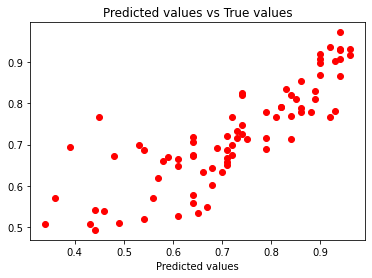

In [84]:
plt.scatter(y_test,y_predict,color='r')
plt.xlabel('True values')
plt.xlabel('Predicted values')
plt.title('Predicted values vs True values')

In [85]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

In [86]:
k=X_test.shape[1]
n=len(X_test)

In [87]:
MAE = mean_absolute_error(y_test,y_predict)
MAPE = mean_absolute_percentage_error(y_test,y_predict)
MSE = mean_squared_error(y_test,y_predict)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test,y_predict)
adj_r2 = 1 - ((n-1)*(1-r2)/(n-k-1))

In [88]:
print('MAE=',MAE,'\nMAPE=',MAPE,'\nMSE=',MSE,'\nRMSE=',RMSE,'\nr2=',r2,'\nadj_r2=',adj_r2)

MAE= 0.06478157679937327 
MAPE= 0.10968639537389069 
MSE= 0.007871975759628133 
RMSE= 0.08872415544612489 
r2= 0.6951606626654038 
adj_r2= 0.6872427577995701
